# Importing modules to use data from Google Drive


In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

## Authenticating User 

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

## Downloading file from Google Drive

In [0]:
fid = drive.ListFile({'q':"title='Mobile_dataset.zip'"}).GetList()[0]['id']
f = drive.CreateFile({'id': fid})
f.GetContentFile('Mobile_dataset.zip')

## Unzipping the downloaded file 

In [0]:
!unzip Mobile_dataset.zip

In [8]:
# deleting corrupt images which interuppted training of model
import os,shutil

os.remove('Mobile_dataset/dog/dog1218.jpg')
shutil.copyfile('Mobile_dataset/dog/dog1217.jpg','Mobile_dataset/dog/dog1218.jpg')

os.remove('Mobile_dataset/quote/quote1017.jpg')
shutil.copyfile('Mobile_dataset/quote/quote1016.jpg','Mobile_dataset/quote/quote1017.jpg')

os.remove('Mobile_dataset/spam/spam1035.jpg')
shutil.copy('Mobile_dataset/spam/spam1034.jpg','Mobile_dataset/spam/spam1035.jpg')

'Mobile_dataset/spam/spam1035.jpg'

## Making Directories for Training, Validation and Testing the Model

In [0]:
import os,shutil 

original_dir='Mobile_dataset'     # original directory downloaded from google drive 

base_dir="data"                   # base directory where we will separate training, validation and testing data 

os.mkdir(base_dir)                # making the base directory 

In [0]:
# Making the training directory 
train_dir=os.path.join(base_dir,"train")
os.mkdir(train_dir)

# Making the Validation directory 
validation_dir=os.path.join(base_dir,"validation")
os.mkdir(validation_dir)

# Making the test directory
test_dir=os.path.join(base_dir,"test")
os.mkdir(test_dir)


### Number of categories in the data 

In [30]:
categories=[i for i in os.listdir(original_dir)]   # list of categories in the data 

num_classes=len(categories)                        # number of categories in the data

print('Number of Categories :', num_classes)
print('Categories :', categories)

Number of Categories : 6
Categories : ['screenshot', 'cat', 'george_bush', 'dog', 'quote', 'spam']


### Making Directories for each category in the training, validation and testing directory.

In [31]:

c=[]

# directories for training pictures 
for j in categories:
  c.append(os.path.join(train_dir,j))
  

# directories for validation pictures
for j in categories:
  c.append(os.path.join(validation_dir,j))
  

#directories for test pictures 
for j in categories:
  c.append(os.path.join(test_dir,j))
  

print(c)

for i in c:
  os.mkdir(i)   #making directories 

['data/train/screenshot', 'data/train/cat', 'data/train/george_bush', 'data/train/dog', 'data/train/quote', 'data/train/spam', 'data/validation/screenshot', 'data/validation/cat', 'data/validation/george_bush', 'data/validation/dog', 'data/validation/quote', 'data/validation/spam', 'data/test/screenshot', 'data/test/cat', 'data/test/george_bush', 'data/test/dog', 'data/test/quote', 'data/test/spam']


### Making list of training directories 

In [32]:
train_categories=[]
for i in categories:
  train_categories.append(base_dir+'/'+"train"+"/"+i)
  
print(train_categories)

['data/train/screenshot', 'data/train/cat', 'data/train/george_bush', 'data/train/dog', 'data/train/quote', 'data/train/spam']


### Making list of validation directories

In [33]:
validation_categories=[]
for i in categories:
  validation_categories.append(base_dir+'/'+"validation"+"/"+i)
  
print(validation_categories)

['data/validation/screenshot', 'data/validation/cat', 'data/validation/george_bush', 'data/validation/dog', 'data/validation/quote', 'data/validation/spam']


### Making list of testing directories

In [34]:
test_categories=[]
for i in categories:
  test_categories.append(base_dir+'/'+"test"+"/"+i)
  
print(test_categories)

['data/test/screenshot', 'data/test/cat', 'data/test/george_bush', 'data/test/dog', 'data/test/quote', 'data/test/spam']


### Making list of original directories

In [35]:
original_dataset=[]
for i in categories:
  original_dataset.append(original_dir+"/"+i)
  
print(original_dataset)

['Mobile_dataset/screenshot', 'Mobile_dataset/cat', 'Mobile_dataset/george_bush', 'Mobile_dataset/dog', 'Mobile_dataset/quote', 'Mobile_dataset/spam']


### Copying the first 1000 images of each category in training directory of each category.
### Copying the next 300 images of each category in validation directory of each category.
### Copying the 200 images of each category in testing directory of each category.

In [0]:
# Copy first 1000 images to train
for i,j in enumerate(categories):
  
  fnames = [x for x in os.listdir(original_dir+'/'+j)[0:1000]]

  for fname in fnames:
      src = os.path.join(original_dataset[i], fname)
      dst = os.path.join(train_categories[i], fname)
      shutil.copyfile(src, dst)
    

In [0]:
#Copy next 300 images for validation

for i,j in enumerate(categories):
  
  fnames = [x for x in os.listdir(original_dir+'/'+j)[1000:1300]]

  for fname in fnames:
      src = os.path.join(original_dataset[i], fname)
      dst = os.path.join(validation_categories[i], fname)
      shutil.copyfile(src, dst)
    

In [0]:
#Copy next 200 images for test

for i,j in enumerate(categories):
  
  fnames = [x for x in os.listdir(original_dir+'/'+j)[1300:1500]]

  for fname in fnames:
      src = os.path.join(original_dataset[i], fname)
      dst = os.path.join(test_categories[i], fname)
      shutil.copyfile(src, dst)

## Counting the total number of Training, Validation and Testing Images

In [39]:
# Total number of training images 
train_img_count=0
for i in os.listdir(base_dir+'/'+"train"):
  train_img_count+=len(os.listdir(base_dir+'/'+'train'+'/'+i))
  
# Total number of Validation Images 
validation_img_count=0
for i in os.listdir(base_dir+'/'+'validation'):
  validation_img_count+=len(os.listdir(base_dir+'/'+'validation'+'/'+i))
  
# Total number of Testing Images 
test_img_count=0
for i in os.listdir(base_dir+'/'+'test'):
  test_img_count+=len(os.listdir(base_dir+'/'+'test'+'/'+i))
  
print('Total Training Images :', train_img_count)
print('Total validation Images:', validation_img_count)
print('Total Test Images:', test_img_count)

Total Training Images : 6000
Total validation Images: 1800
Total Test Images: 1200


# Creating Model

### Importing required Modules 

In [40]:
import keras 
import tensorflow as tf 
import numpy as np


Using TensorFlow backend.


In [0]:
img_height = 250
img_width = 250
BATCH_SIZE = 128

# Creating Model

In [42]:

model = tf.keras.models.Sequential([                                      # Creating Sequential Model

tf.keras.layers.Conv2D(32, (3, 3), activation='relu',                     # Adding First Convolutional layer in the network
                        input_shape=(img_height,img_width, 3)),

tf.keras.layers.MaxPooling2D((2, 2)),                                     # adding First Pooling layer in the network

tf.keras.layers.Conv2D(64, (3, 3),padding='same', activation='relu'),     # Adding Second Convolutional layer in the network

tf.keras.layers.MaxPooling2D((2, 2)),                                     # Adding Second Pooling layer in the network

tf.keras.layers.Conv2D(64, (3, 3),padding='same', activation='relu'),     # Adding Third Convolutional layer in the network
  
tf.keras.layers.MaxPooling2D((2, 2)),                                     # Adding Third Pooling layer in the network

tf.keras.layers.Dropout(0.25),


tf.keras.layers.Conv2D(128, (3, 3),padding='same', activation='relu'),    # Adding Fourth Convolutional layer in the network 

tf.keras.layers.MaxPooling2D((2, 2)),                                     # Adding Fourth Pooling layer in the network

tf.keras.layers.Conv2D(128, (3, 3),padding='same', activation='relu'),    # Adding Fifth Convolutional Layer in the network

tf.keras.layers.MaxPooling2D((2, 2)),                                     # Adding Fifth Pooling layer in the network

tf.keras.layers.Dropout(0.25),


tf.keras.layers.Flatten(),                                                # Flattening the layers (Making it into one dimensional from 3 dimensional)
                                                             
tf.keras.layers.Dense(512, activation='relu'),                            # Adding Dense Layer with 512 neurons 
 
tf.keras.layers.Dense(256, activation='relu'),                            # Adding Dense Layer with 512 neurons 

    
tf.keras.layers.Dense(num_classes, activation='softmax')])                # Adding Output Dense Layer with softmax(gives probability of each output class)
                                                                          # activation function

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [43]:
# Summary of the Model 

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 248, 248, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 124, 124, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 124, 124, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 62, 62, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 64)        0         
__________

## Converting the keras model into TPU Model 

The **"tf.contrib.tpu.keras_to_tpu_model"** function converts a tf.keras model to an equivalent TPU version.

In [44]:
import os
tpu_model = tf.contrib.tpu.keras_to_tpu_model(
    model,
    strategy=tf.contrib.tpu.TPUDistributionStrategy(
        tf.contrib.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])
    )
)


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

INFO:tensorflow:Querying Tensorflow master (grpc://10.88.68.50:8470) for TPU system metadata.
INFO:tensorflow:Found TPU system:
INFO:tensorflow:*** Num TPU Cores: 8
INFO:tensorflow:*** Num TPU Workers: 1
INFO:tensorflow:*** Num TPU Cores Per Worker: 8
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, -1, 16042429827769690896)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 17179869184, 14774654897894731321)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 17179869184, 8063843530081627383)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1

### Compiling Model 

In [0]:
tpu_model.compile( optimizer=tf.train.AdamOptimizer(learning_rate=1e-3, ),
                   loss=tf.keras.losses.categorical_crossentropy,
                   metrics=['accuracy'] )


### Processing Images before feeding into the Neural Network 

In [47]:
# All images will be rescaled by 1./255
# means all the pixels values will be in the range (0,1)

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                               rotation_range=40,
                                                                
                                                            width_shift_range=0.2,
                                                            height_shift_range=0.2,
                                                            shear_range=0.2,
                                                            zoom_range=0.2,
                                                            horizontal_flip=True,
                                                               vertical_flip=True)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)


# Converting the data into Batches for easier processing 

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_height, img_width),
        batch_size=BATCH_SIZE,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')


validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_height, img_width),
        batch_size=BATCH_SIZE,
        class_mode='categorical')

Found 6000 images belonging to 6 classes.
Found 1800 images belonging to 6 classes.


In [48]:
# Shape of the Batches formed 

for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (128, 250, 250, 3)
labels batch shape: (128, 6)


## Training Model 

In [49]:
# Train the model
batch_size = BATCH_SIZE
train_steps_per_epoch = train_img_count // batch_size
val_steps_per_epoch = validation_img_count // batch_size

history = tpu_model.fit_generator(train_generator,
                              steps_per_epoch=train_steps_per_epoch,
                              validation_data=validation_generator,
                              validation_steps=val_steps_per_epoch,
                              epochs=50, 
                              verbose=1)   

Epoch 1/50


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:914: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


INFO:tensorflow:New input shapes; (re-)compiling: mode=train (# of cores 8), [TensorSpec(shape=(16,), dtype=tf.int32, name='core_id0'), TensorSpec(shape=(16, 250, 250, 3), dtype=tf.float32, name='conv2d_input_10'), TensorSpec(shape=(16, 6), dtype=tf.float32, name='dense_2_target_30')]
INFO:tensorflow:Overriding default placeholder.
INFO:tensorflow:Remapping placeholder for conv2d_input
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.
INFO:tensorflow:Started compiling
INFO:tensorflow:Finished compiling. Time elapsed: 24.851295232772827 secs
INFO:tensorflow:Setting weights on TPU model.
24/47 [==============>...............] - ETA: 1:04 - loss: 1.7015 - acc: 0.2428INFO:tensorflow:New input shapes; (re-)compiling: mode=train (# of cores 8), [TensorSpec(shape=(14,), dtype=tf.int32, name='core_id0'), TensorSpec(shape=(14, 250, 250, 3), dtype=tf.float32, name='conv2d_input_10'), TensorSpec(shape=(14, 6), dtype=tf.float32, name='dense_2_target_30

In [50]:
# Saving the Model 
tpu_model.save('Mobile_dataset_project_TPU_model.h5')  

INFO:tensorflow:Copying TPU weights to the CPU


### Plotting the training and validation loss, accuracy 

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:914: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


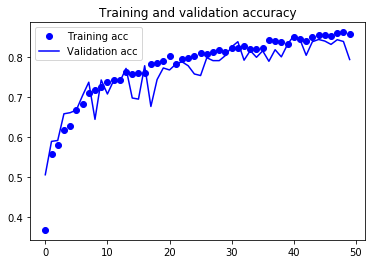

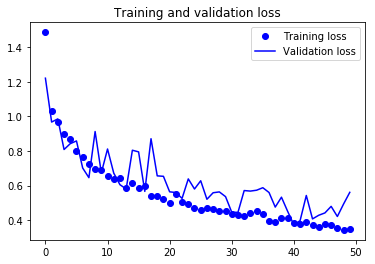

In [51]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Testing the Model 

In [52]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_height,img_width),
        batch_size=BATCH_SIZE,
        class_mode='categorical')

test_loss, test_acc = tpu_model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)
print('test loss:', test_loss)

Found 1200 images belonging to 6 classes.


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:914: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


INFO:tensorflow:New input shapes; (re-)compiling: mode=eval (# of cores 8), [TensorSpec(shape=(6,), dtype=tf.int32, name='core_id_10'), TensorSpec(shape=(6, 250, 250, 3), dtype=tf.float32, name='conv2d_input_10'), TensorSpec(shape=(6, 6), dtype=tf.float32, name='dense_2_target_30')]
INFO:tensorflow:Overriding default placeholder.
INFO:tensorflow:Remapping placeholder for conv2d_input
INFO:tensorflow:Started compiling
INFO:tensorflow:Finished compiling. Time elapsed: 24.94891905784607 secs
test acc: 0.79083335
test loss: 0.5826635509729385


##Confusion Matrix 

In [54]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_height,img_width),
        batch_size=test_img_count,
        class_mode='categorical')

imgs,labels=next(test_generator)

y_true=[labels[i].argmax(axis=-1) for i in range(len(labels))]

predictions=tpu_model.predict(imgs)

y_pred =[ predictions[i].argmax(axis=-1) for i in range(len(predictions))]

class_names = np.asarray(categories)

Found 1200 images belonging to 6 classes.


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:914: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


INFO:tensorflow:New input shapes; (re-)compiling: mode=infer (# of cores 8), [TensorSpec(shape=(4, 250, 250, 3), dtype=tf.float32, name='conv2d_input_10')]
INFO:tensorflow:Overriding default placeholder.
INFO:tensorflow:Remapping placeholder for conv2d_input
INFO:tensorflow:Started compiling
INFO:tensorflow:Finished compiling. Time elapsed: 24.620843172073364 secs
INFO:tensorflow:New input shapes; (re-)compiling: mode=infer (# of cores 8), [TensorSpec(shape=(2, 250, 250, 3), dtype=tf.float32, name='conv2d_input_10')]
INFO:tensorflow:Overriding default placeholder.
INFO:tensorflow:Remapping placeholder for conv2d_input
INFO:tensorflow:Started compiling
INFO:tensorflow:Finished compiling. Time elapsed: 14.125324010848999 secs


In [55]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels

cm = confusion_matrix(y_true,y_pred)
cm

array([[128,  63,   0,   3,   6,   0],
       [ 15, 165,   0,   5,  15,   0],
       [  0,   1, 199,   0,   0,   0],
       [  1,   8,   0, 158,  33,   0],
       [  0,   1,   0,  10, 189,   0],
       [  1,  11,   0,  42,  36, 110]])

In [0]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)
    
    fig, ax = plt.subplots(figsize=(8, 8))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Confusion matrix, without normalization


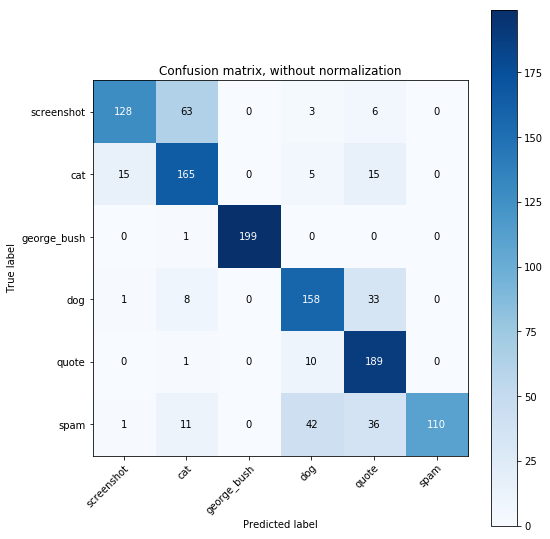

In [57]:
plot_confusion_matrix(y_true, y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')

Normalized confusion matrix


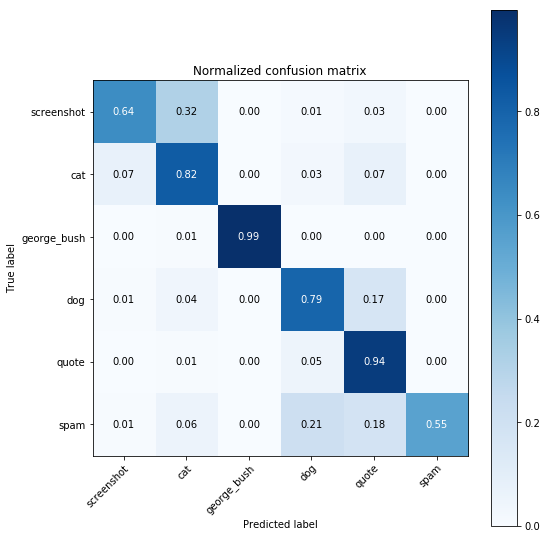

In [58]:
# Plot normalized confusion matrix
plot_confusion_matrix(y_true, y_pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

##Classification Report 

In [59]:
from sklearn.metrics import classification_report

print(classification_report(y_true,y_pred,target_names=class_names))

              precision    recall  f1-score   support

  screenshot       0.88      0.64      0.74       200
         cat       0.66      0.82      0.73       200
 george_bush       1.00      0.99      1.00       200
         dog       0.72      0.79      0.76       200
       quote       0.68      0.94      0.79       200
        spam       1.00      0.55      0.71       200

    accuracy                           0.79      1200
   macro avg       0.82      0.79      0.79      1200
weighted avg       0.82      0.79      0.79      1200



##Prediction on new images 

In [60]:
generator= train_datagen.flow_from_directory(train_dir, batch_size=BATCH_SIZE)
label_map = (generator.class_indices)
label_map

Found 6000 images belonging to 6 classes.


{'cat': 0, 'dog': 1, 'george_bush': 2, 'quote': 3, 'screenshot': 4, 'spam': 5}

In [61]:
from tensorflow.keras.preprocessing import image

# Converting the tpu model into cpu model 
cpu_model = tpu_model.sync_to_cpu()


# Predict function 
def predict(img_path):
  
  img = image.load_img(img_path, target_size=(img_height, img_width))
  img_tensor = image.img_to_array(img)
  img_tensor = np.expand_dims(img_tensor, axis=0)
  img_tensor /= 255.

  prediction=cpu_model.predict(img_tensor)
  y_class=prediction[0].argmax(axis=-1)

  #print(prediction[0])
  #print(y_class)

  for i in label_map:
    if label_map[i]==y_class:

      print(i)

  from IPython.display import Image
  display(Image(img_path,height=img_height,width=img_width))

INFO:tensorflow:Copying TPU weights to the CPU


###  Prediction on new images

Mobile_dataset_test folder has some images for the testing of the model 

In [0]:
fid = drive.ListFile({'q':"title='Mobile_dataset_test.zip'"}).GetList()[0]['id']
f = drive.CreateFile({'id': fid})
f.GetContentFile('Mobile_dataset_test.zip')

In [68]:
!unzip Mobile_dataset_test.zip

Archive:  Mobile_dataset_test.zip
  inflating: test/test (1).jpg       
  inflating: test/test (10).jpg      
  inflating: test/test (11).jpg      
  inflating: test/test (12).jpg      
  inflating: test/test (13).jpg      
  inflating: test/test (14).jpg      
  inflating: test/test (15).jpg      
  inflating: test/test (16).jpg      
  inflating: test/test (17).jpg      
  inflating: test/test (18).jpg      
  inflating: test/test (19).jpg      
  inflating: test/test (2).jpg       
  inflating: test/test (20).jpg      
  inflating: test/test (21).jpg      
  inflating: test/test (22).jpg      
  inflating: test/test (23).jpg      
  inflating: test/test (24).jpg      
  inflating: test/test (25).jpg      
  inflating: test/test (26).jpg      
  inflating: test/test (27).jpg      
  inflating: test/test (3).jpg       
  inflating: test/test (4).jpg       
  inflating: test/test (5).jpg       
  inflating: test/test (6).jpg       
  inflating: test/test (7).jpg       
  inflating: tes

cat


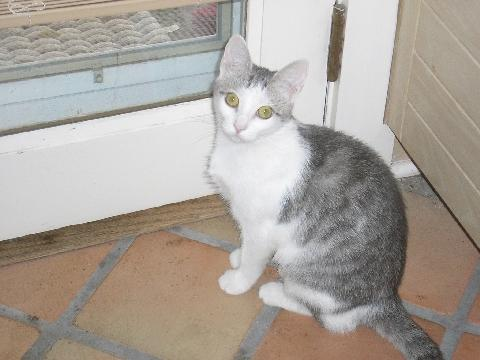

spam


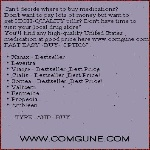

quote


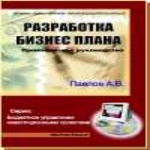

dog


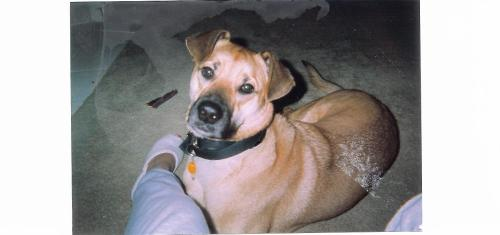

dog


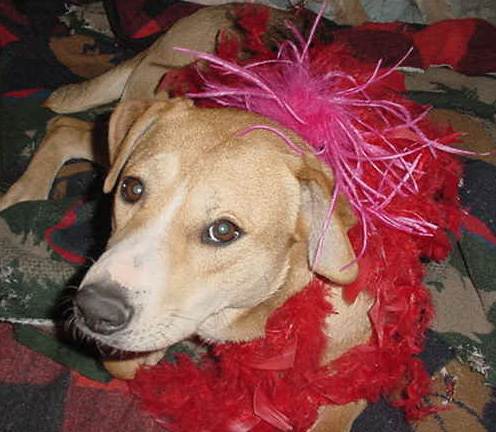

quote


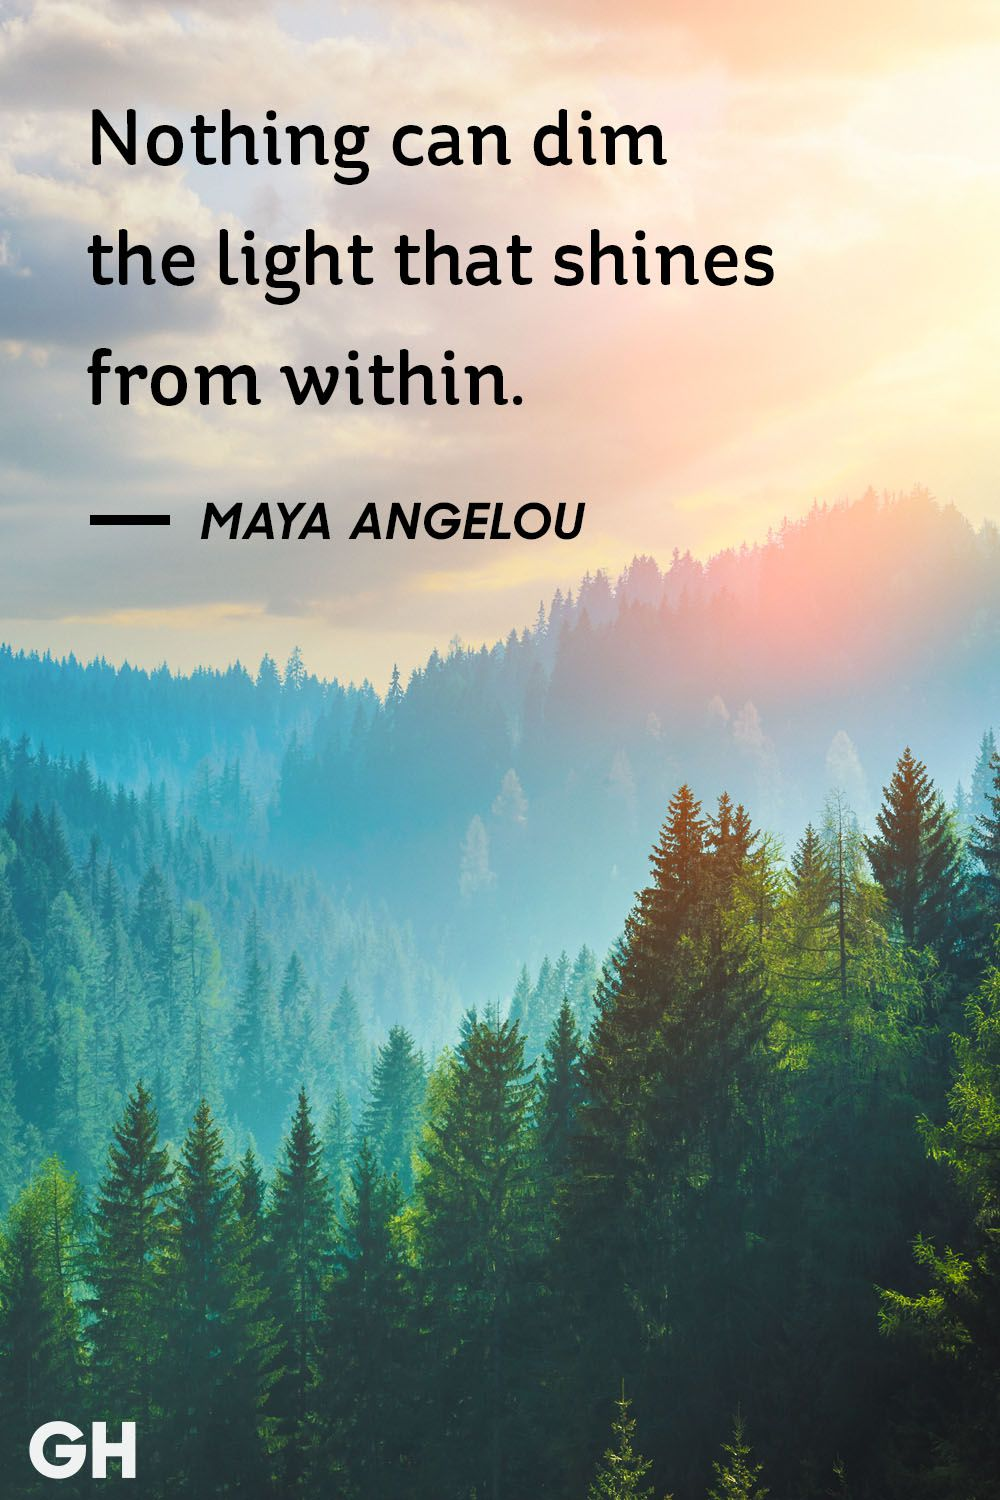

cat


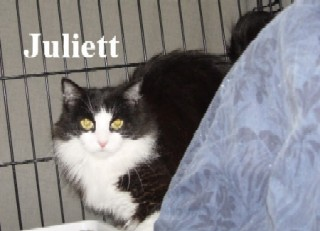

george_bush


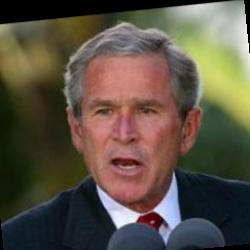

george_bush


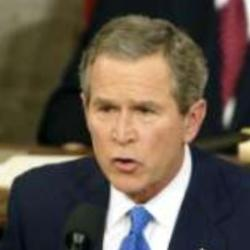

quote


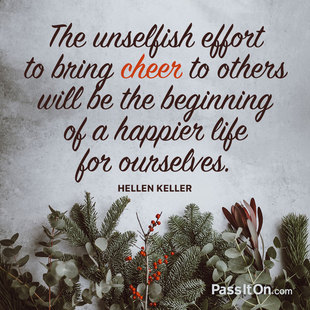

quote


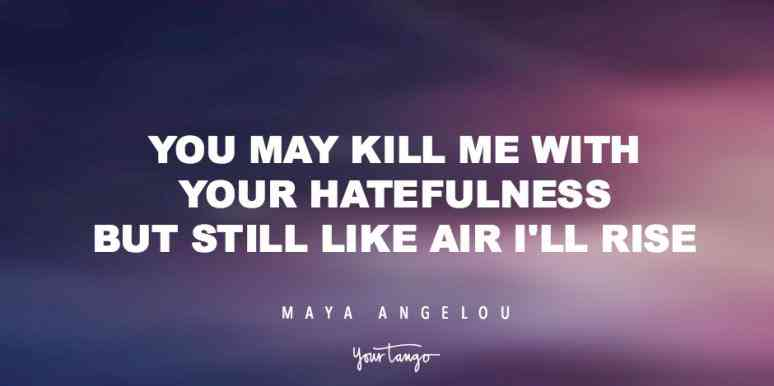

screenshot


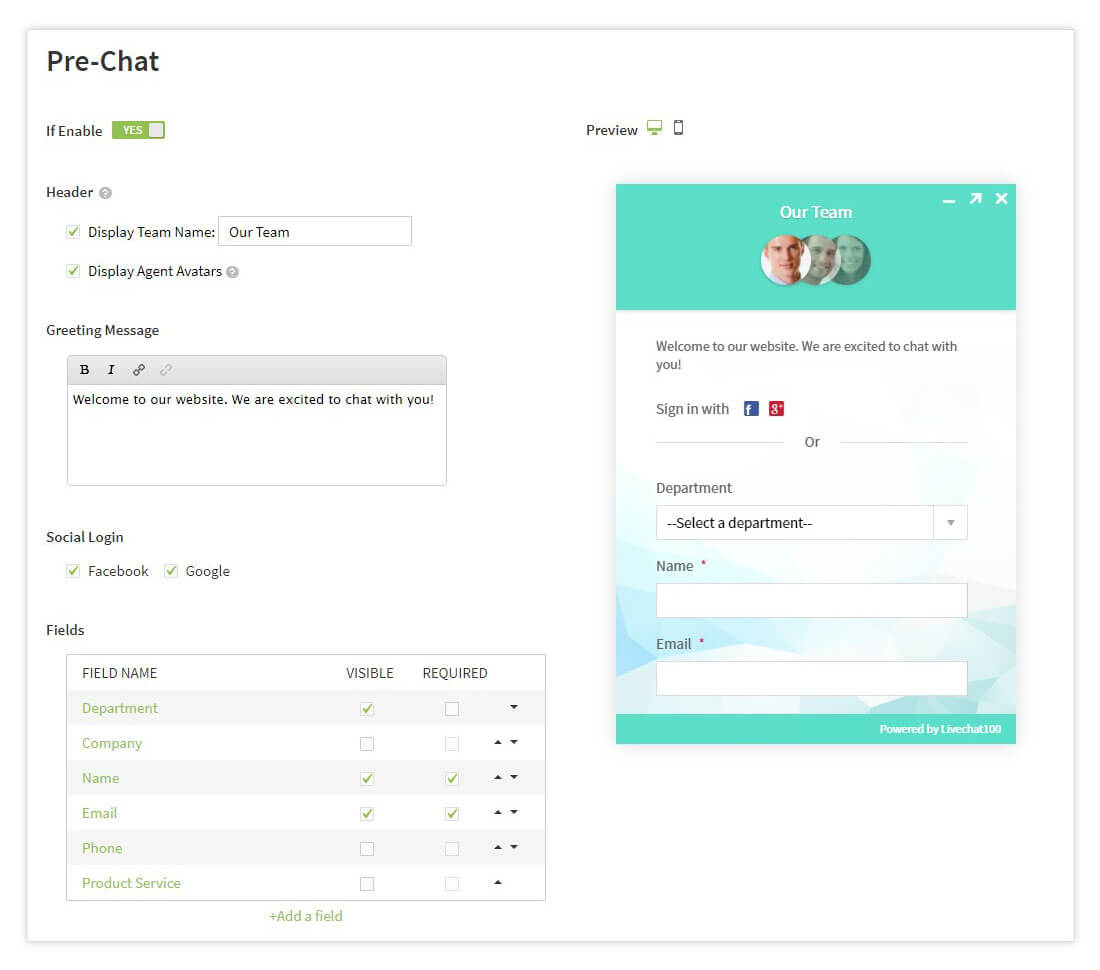

screenshot


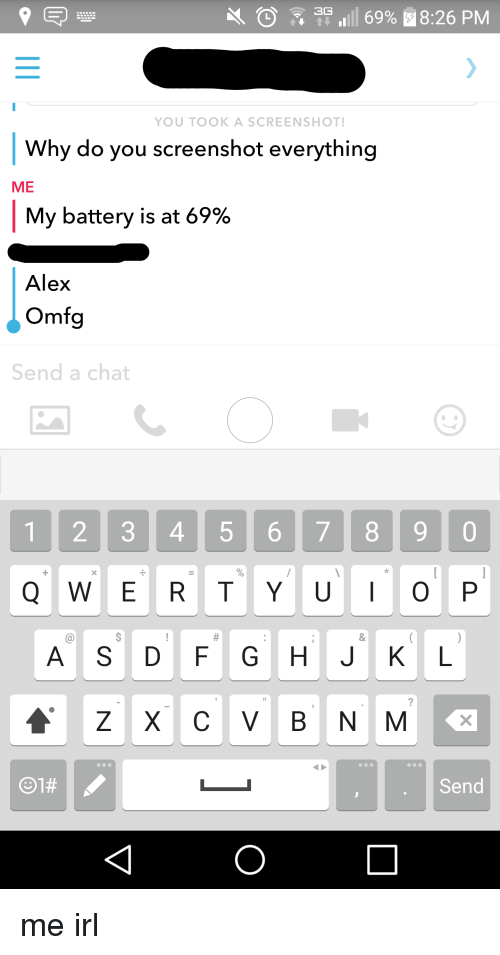

screenshot


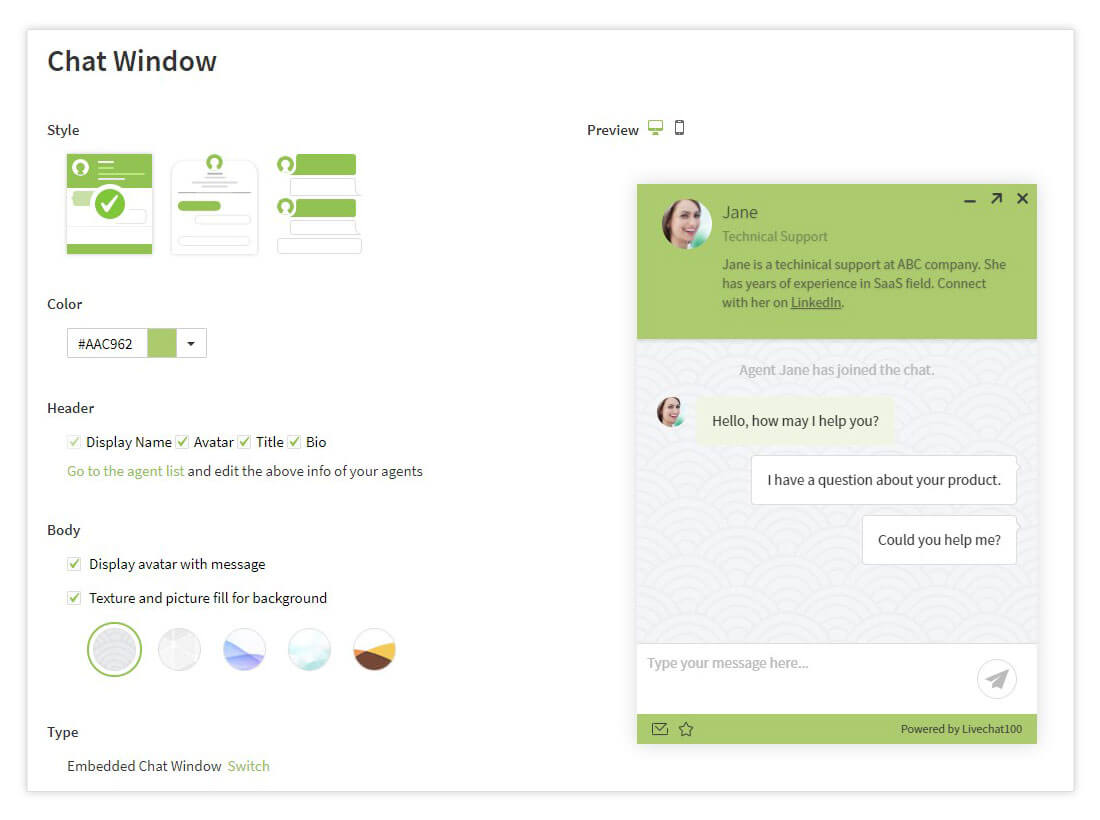

screenshot


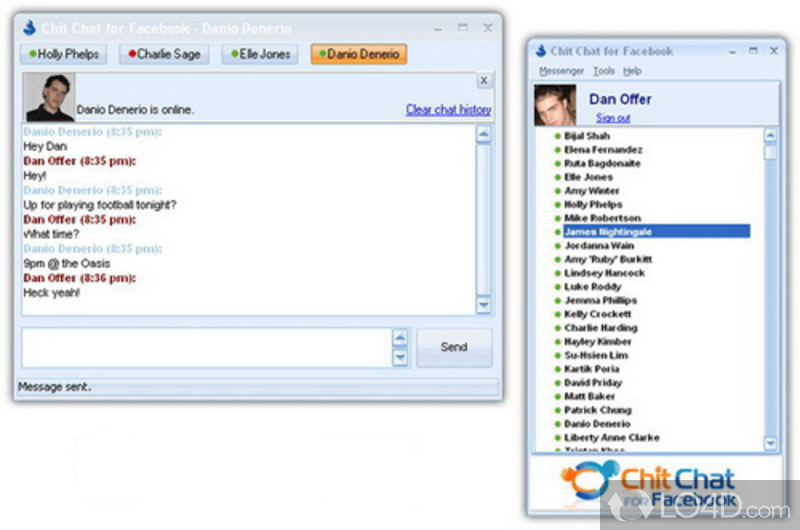

dog


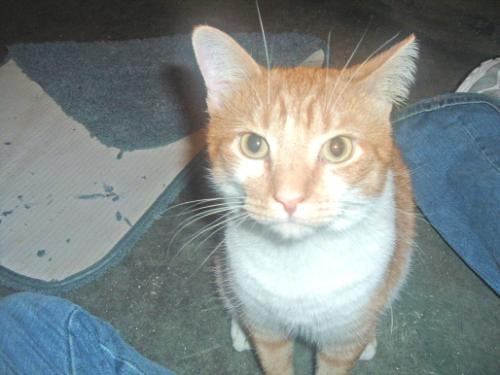

george_bush


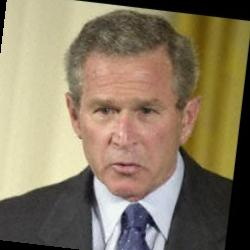

dog


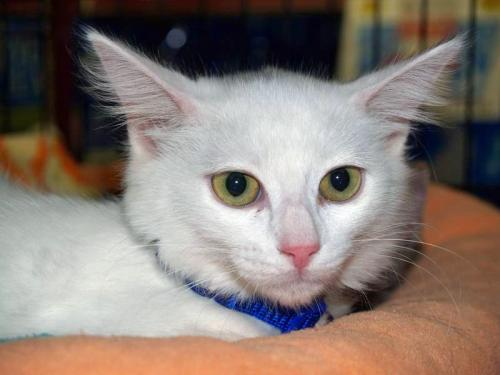

george_bush


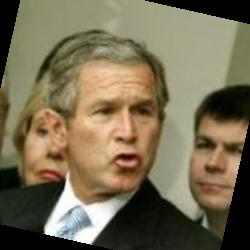

dog


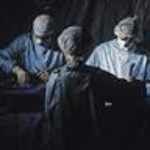

dog


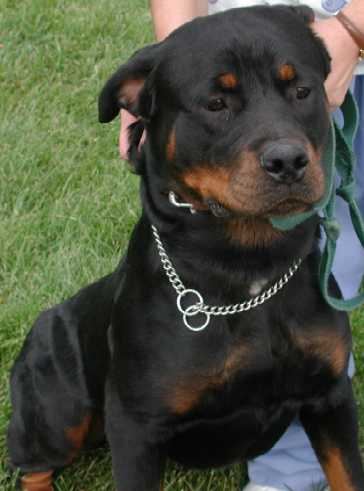

dog


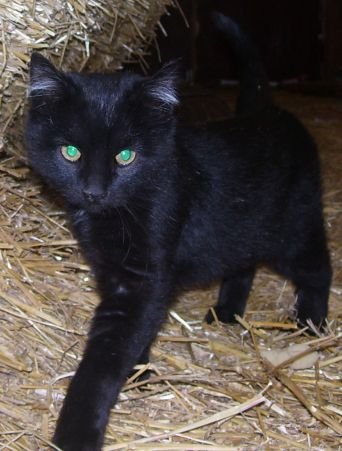

spam


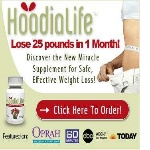

quote


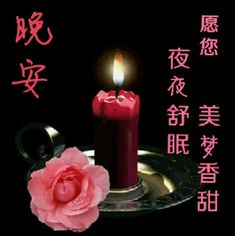

dog


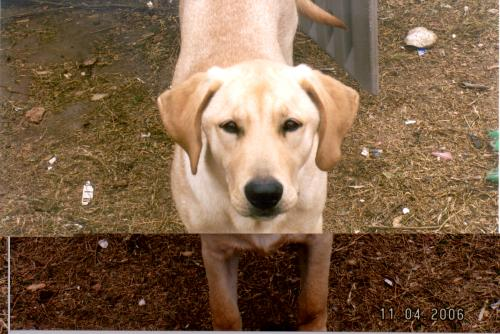

dog


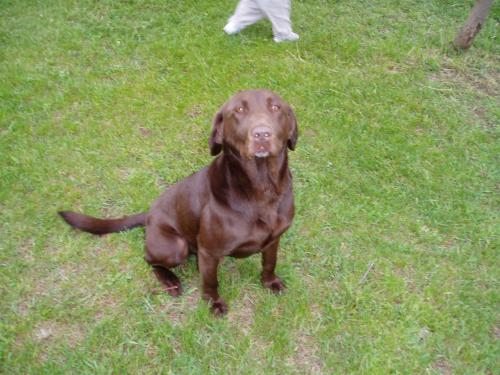

dog


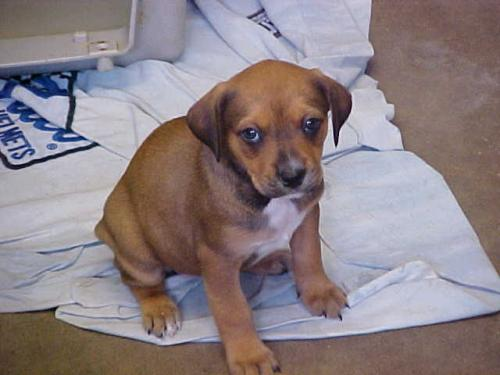

In [69]:
for i in os.listdir('test'):
  predict('test'+'/'+i)